In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd #import pandas
import matplotlib.pyplot as plt

In [90]:
file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/house_data.csv'
house= pd.read_csv(file_path)
house.head() #memasukkan dan membaca dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [91]:
house.shape #menampilkan bentuk data

(21613, 21)

In [92]:
house.columns #menampilkan jumlah kolom pada data

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [93]:
house.describe() #menampilkan ringkasan dari data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [94]:
house.describe().loc['max', 'long'] #menampilkan rumah yang paling panjang

-121.315

In [95]:
house.describe()['long']['max'] #menampilkan rumah yang paling panjang juga, tapi dengan beda command

-121.315

In [96]:
house = house.dropna() #membersihkan atau menghapus data NAN

In [97]:
house.shape

(21613, 21)

In [98]:
y = house['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [99]:
features = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition']
X = house[features]
X #memilih fitur pada rumah yang ada

,bedrooms,bathrooms,floors,view,condition
0,3,1.00,1.0,0,3
1,3,2.25,2.0,0,3
2,2,1.00,1.0,0,3
3,4,3.00,1.0,0,5
4,3,2.00,1.0,0,3
...,...,...,...,...,...
21608,3,2.50,3.0,0,3
21609,4,2.50,2.0,0,3
21610,2,0.75,2.0,0,3
21611,3,2.50,2.0,0,3


In [100]:
X.describe()

,bedrooms,bathrooms,floors,view,condition
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,1.494309,0.234303,3.409430
std,0.930062,0.770163,0.539989,0.766318,0.650743
min,0.000000,0.000000,1.000000,0.000000,1.000000
25%,3.000000,1.750000,1.000000,0.000000,3.000000
50%,3.000000,2.250000,1.500000,0.000000,3.000000
75%,4.000000,2.500000,2.000000,0.000000,4.000000
max,33.000000,8.000000,3.500000,4.000000,5.000000


In [101]:
#Importing DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor

In [102]:
#konfigurasi model
housing_model = DecisionTreeRegressor(random_state=1)

In [103]:
#model training
housing_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [104]:
#prediksi model
housing_model.predict(X.head())

array([313540.21750663, 449993.33333333, 333926.48271447, 621100.        ,
       377146.73969072])

In [105]:
X.head()

,bedrooms,bathrooms,floors,view,condition
0,3,1.00,1.0,0,3
1,3,2.25,2.0,0,3
2,2,1.00,1.0,0,3
3,4,3.00,1.0,0,5
4,3,2.00,1.0,0,3


In [106]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [107]:
import numpy as np
np.random.seed(0)

for _ in range(10):
    print(np.random.randint(10))

5
0
3
3
7
9
3
5
2
4


In [108]:
#validasi terhadap model
from sklearn.metrics import mean_absolute_error

In [109]:
y_hat = housing_model.predict(X)
mean_absolute_error(y, y_hat)

154914.88055727494

In [110]:
#training dataset
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7)

In [112]:
#training dan konfigurasi terhdap model
housing_model = DecisionTreeRegressor(random_state=1)
housing_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [113]:
#evaluasi model
y_hat = housing_model.predict(X_test)
mean_absolute_error(y_test, y_hat)

189174.09149549282

In [114]:
#optimasi terhadap model
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_hat)
    return mae

In [115]:
# membandingkan MAE dengan beberapa nilai max_leaf_nodes untuk menemukan jumlah leaf
for max_leaf_nodes in [5, 50, 500, 5000]:
    leaf_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f'Max leaf nodes: {max_leaf_nodes} \t Mean Absolute Error: {int(leaf_mae)}')

Max leaf nodes: 5 	 Mean Absolute Error: 197243
Max leaf nodes: 50 	 Mean Absolute Error: 183506
Max leaf nodes: 500 	 Mean Absolute Error: 186587
Max leaf nodes: 5000 	 Mean Absolute Error: 189763


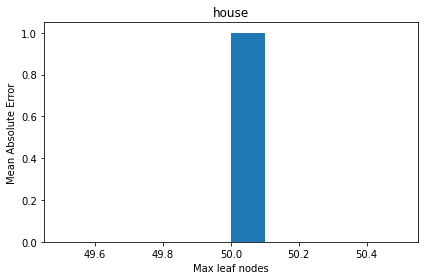

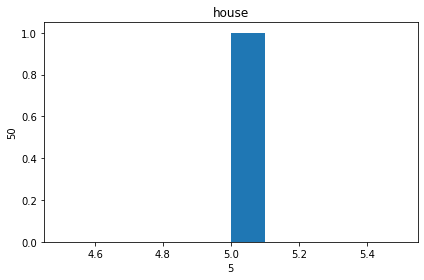

In [126]:
plt.hist(x=50, data=house)
plt.xlabel('Max leaf nodes')
plt.ylabel('Mean Absolute Error')
plt.title('house')
plt.tight_layout()
plt.show()

plt.hist(x=5, data=house)
plt.xlabel(5)
plt.ylabel(50)
plt.title('house')
plt.tight_layout()
plt.show()

In [85]:
#eksplorasi dengan random forest
from sklearn.ensemble import RandomForestRegressor

In [86]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
print(f'Mean Absolute Error: {int(mean_absolute_error(y_test, y_hat))}')

Mean Absolute Error: 182889
